<a href="https://colab.research.google.com/github/nguyenanhbinh27042002/Artificial-intelligence-AI-/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar10

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 



In [3]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()
#(60000, 28, 28), (60000), (10000,28,28)

170498071/170498071 [==============================] - 3s 0us/step


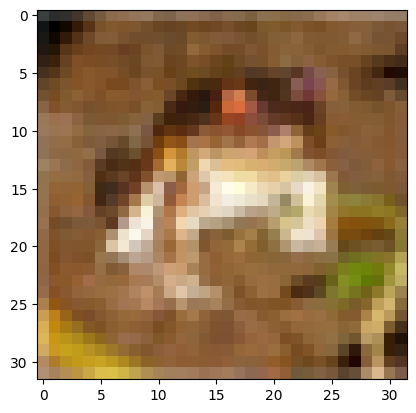

Cai nay la: [6]


In [4]:
hinh = train_images[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[0])

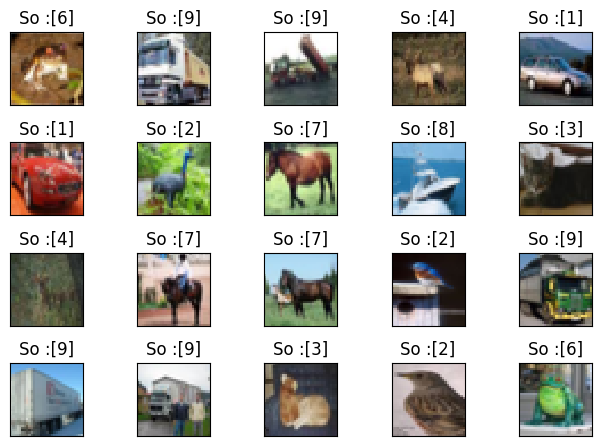

In [5]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:

model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape= (32*32*3,))) #Gia tri toi uu
model.add(Dense(10, activation= 'softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

In [8]:
test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255

In [9]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [10]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 1024)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
49/49 [==============================] - 6s 11ms/step - loss: 3.5041 - accuracy: 0.1780
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 2.1062 - accuracy: 0.2411
Epoch 3/20
49/49 [==============================] - 1s 10ms/step - loss: 2.0201 - accuracy: 0.2771
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 1.9447 - accuracy: 0.3024
Epoch 5/20
49/49 [==============================] - 1s 10ms/step - loss: 1.8986 - accuracy: 0.3228
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 1.8530 - accuracy: 0.3400
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 1.8280 - accuracy: 0.3480
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 1.7977 - accuracy: 0.3567
Epoch 9/20
49/49 [==============================] - 1s 12ms/step - loss: 1.7754 - accuracy: 0.3707
Epoch 10/20
49/49 [==============================] - 1s 12ms/step - loss: 1.7504 - accuracy: 0.3789
Epoch 11/

In [11]:
model.save('cifar10.h5')

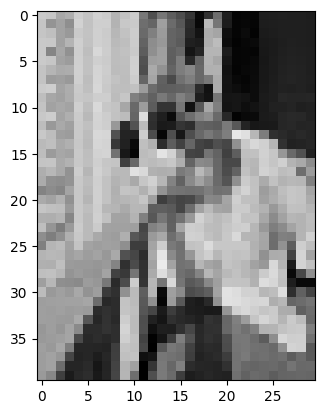

In [16]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('avatar-meo-ngau-38.jpg')
imshow(img)


In [17]:
img = load_img('avatar-meo-ngau-38.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 24ms/step


array([8])

In [ ]:
#Nhu vay AI da du doan dung tam anh tren